# **OpenCV. Классические подходы**

Рассмотрим некоторые классические алгоритмы фильтрации изображений, реализованные в библиотеке OpenCV.

## Import packages

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## 1. Преобразование цветового пространства
*Цветовая модель* - математическая модель описания представления цветов в виде чисел, называемых цветовыми компонентами. 
<br>
*Цветовое пространство* - все возможные значения цветов, задаваемые цветовой моделью.

*RGB (Red, Green, Blue)* - цветовая модель, описывающая способ кодирования цвета с помощью трех основных цветов - красного, зеленого и синего:

<img src="./images/rgb_cube.png" width=350>

*HSV (Hue, Saturation, Value)*, или *HSB (Hue, Saturation, Brightness)* - цветовая модель, в которой координатами цвета являются цветовой тон, насыщенность и яркость:
<img src="./images/hsv.png" width=350>

[cv.cvtColor(src, code\[, dst\[, dstCn\]\])](https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab)
<br>
*src*: входное изображение
<br>
*code*: [ColorConversionCodes](https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0)

(400, 400, 3)


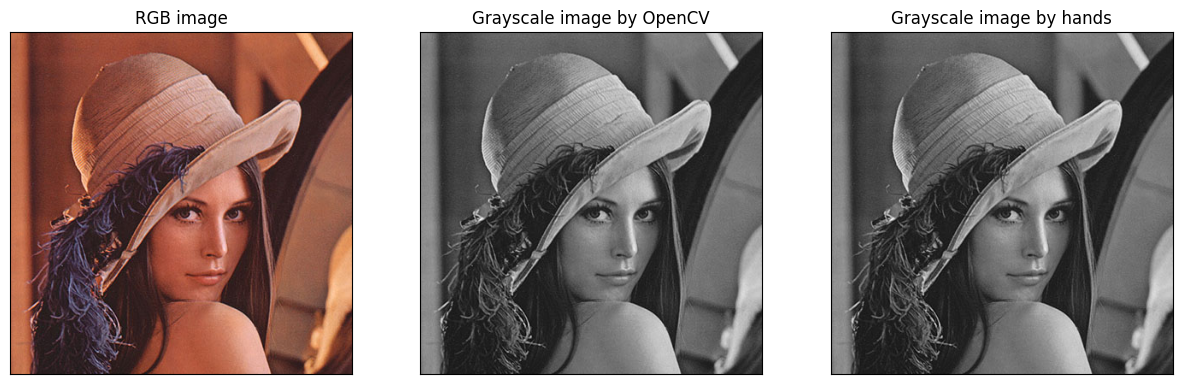

Equal: True


In [42]:
plt.rcParams['figure.figsize'] = [15, 10]
img_path = 'data/lena.png'

# Открываем изображение:
img_bgr = cv.imread(img_path)
print(img_bgr.shape)

# BGR -> Grayscale (OpenCV):
img_gray = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY)      # cv.COLOR_GRAY2BGR, cv.COLOR_RGB2BGR

# BRG -> Grayscale (вручную):                           # RGB to GRAY: 0.299⋅R + 0.587⋅G + 0.114⋅B              
img_gray2 = img_bgr[...,0]*0.114 + \
            img_bgr[...,1]*0.587 + \
            img_bgr[...,2]*0.299
img_gray2 = np.rint(img_gray2).astype(np.uint8)         # округляем float и преобразуем в uint8

# [...,::-1] выполняет инверсию порядка каналов
# plt.subplot(2,3,1), plt.imshow(img_bgr[...,::-1]), plt.title("RGB image")
plt.subplot(1,3,1), plt.imshow(img_bgr[..., ::-1]), plt.title("RGB image")
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2), plt.imshow(img_gray,'gray'), plt.title('Grayscale image by OpenCV')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3), plt.imshow(img_gray2,'gray'), plt.title('Grayscale image by hands')
plt.xticks([]),plt.yticks([])
plt.show()

print('Equal:', np.array_equal(img_gray, img_gray2))

## 2. Построение гистограммы
*Гистограмма изображения* - это график распределения компонентов (пикселей) изображения с различным цветом/яркостью. 
<br>
Интервалы, в которые группируются пиксели, называются *бинами*.

<img src="./images/histogram.jpg">
<img src="./images/histogram2.jpg">

[cv.calcHist(images, channels, mask, histSize, ranges\[, hist\[, accumulate\]\]](https://docs.opencv.org/3.4/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d)
<br>
*images*: входное изображение
<br>
*channels*: для каких каналов нужно посчитать гистограмму
<br>
*mask*: можно посчитать гистограмму только для заданной области изображения
<br>
*histSize*: число бинов (цветовых интервалов) гистограммы
<br>
*ranges*: обычно [0,256]
<br>
*accumulate*: очищать гистограмму перед построением

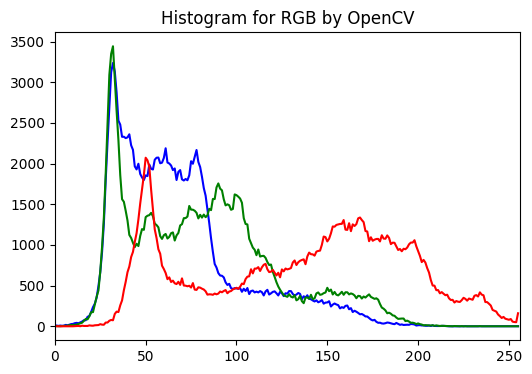

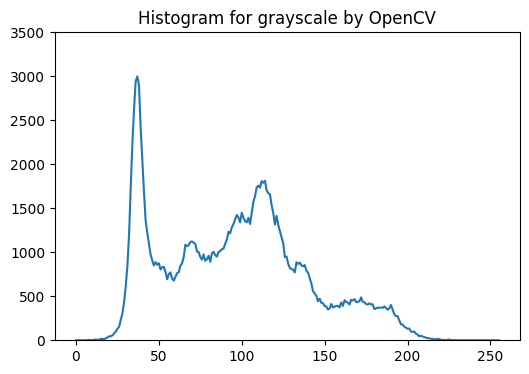

C:\Users\dmitr\AppData\Local\Temp\ipykernel_18256\1461505880.py:27: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img_gray.ravel(),256,[0,256])


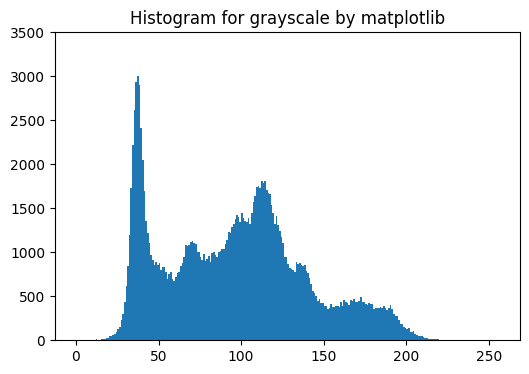

In [44]:
plt.rcParams['figure.figsize'] = [6, 4]
img_path = 'data/lena.png'

# Открываем изображение:
img = cv.imread(img_path, cv.IMREAD_COLOR)

# Строим гистограмму для RGB (OpenCV):
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histogram for RGB by OpenCV')
plt.show()

# BGR -> Grayscale:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Строим гистограмму для grayscale (OpenCV):
histr = cv.calcHist([img_gray],[0],None,[256],[0,256])
plt.plot(histr)
plt.title('Histogram for grayscale by OpenCV')
plt.ylim([0,3500])
plt.show()

# Строим гистограмму (matplotlib):
plt.hist(img_gray.ravel(),256,[0,256])
plt.title('Histogram for grayscale by matplotlib')
plt.ylim([0,3500])
plt.show()

## 3.1 Выравнивание гистограммы (grayscale)
[cv.equalizeHist(src[, dst])
](https://docs.opencv.org/3.4/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e)

<img src="./images/equalizeHist.png">

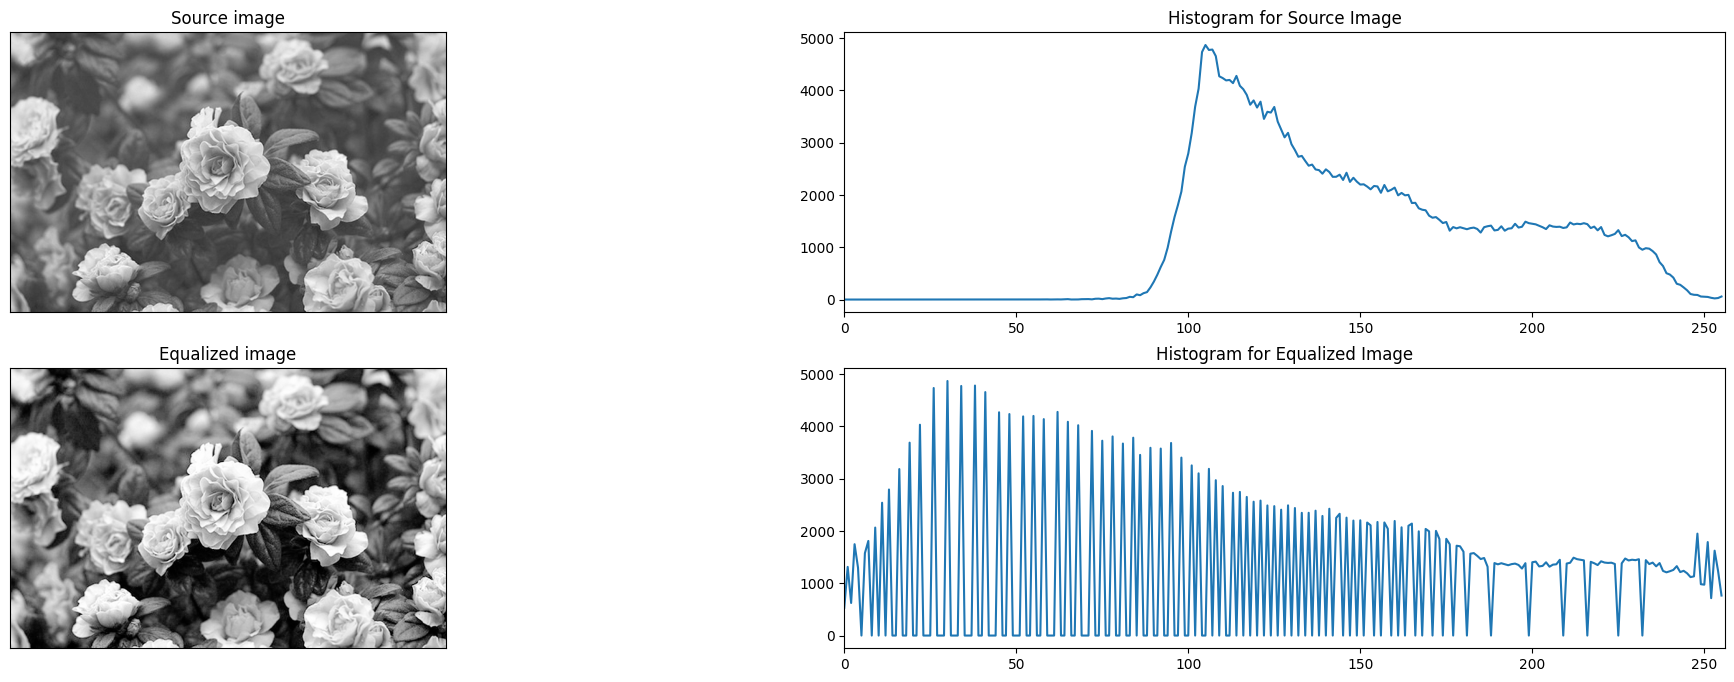

In [69]:
plt.rcParams['figure.figsize'] = [25, 8]
img_path = 'data/flowers.jpg'

# Открываем изображение:
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

# Выравнивание гистограммы:
img_eq = cv.equalizeHist(img)

plt.subplot(2,2,1), plt.imshow(img,'gray'), plt.title('Source image')
plt.xticks([]),plt.yticks([])
plt.subplot(2,2,3), plt.imshow(img_eq,'gray'), plt.title('Equalized image')
plt.xticks([]),plt.yticks([])
# plt.show()

# Строим гистограммы:
histr = cv.calcHist([img],[0],None,[256],[0,256])
histr_eq = cv.calcHist([img_eq],[0],None,[256],[0,256])

plt.subplot(2,2,2), plt.plot(histr), plt.xlim([0,256]), plt.title('Histogram for Source Image')
plt.subplot(2,2,4), plt.plot(histr_eq),  plt.xlim([0,256]), plt.title('Histogram for Equalized Image')
plt.show()

## 3.2 Выравнивание гистограммы (RGB)

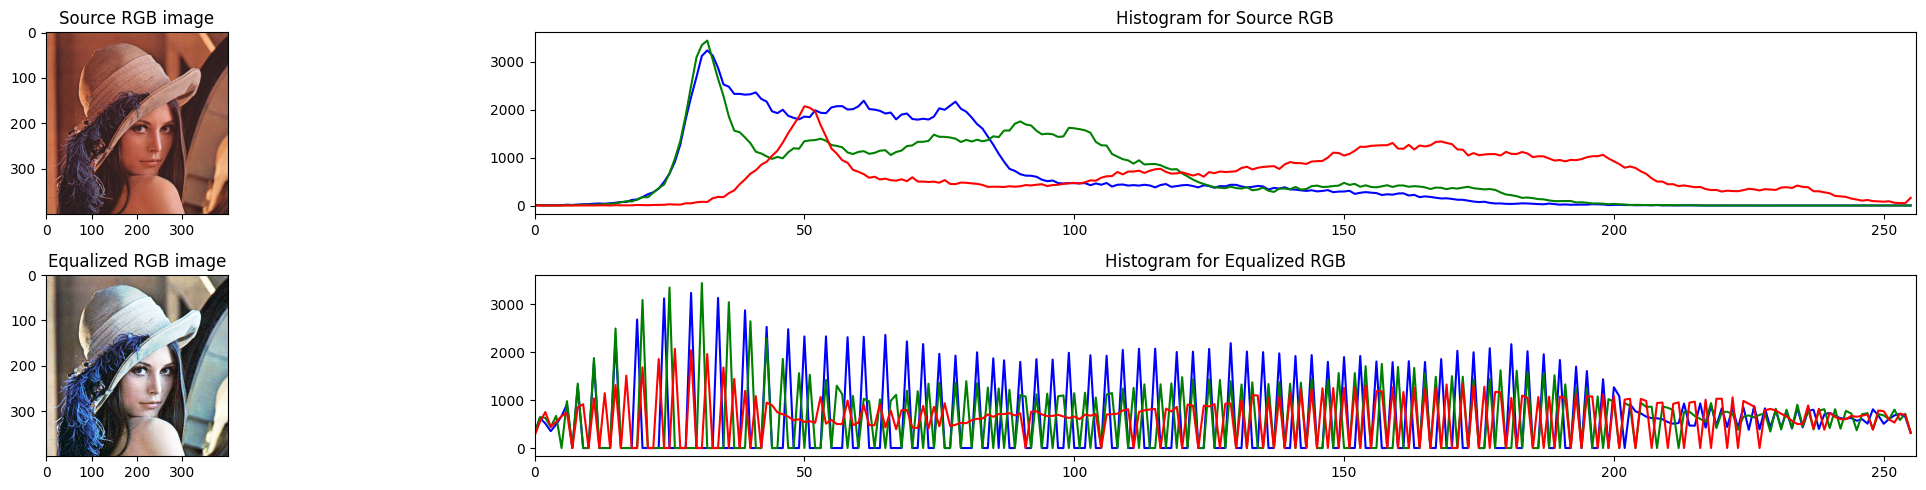

In [70]:
plt.rcParams['figure.figsize'] = [25, 5]
img_path = 'data/lena.png'

# Открываем изображение:
img = cv.imread(img_path, 1)

# Разделяем RGB-изображение на каналы:
r,g,b = cv.split(img)

# Выравнивание гистограммы для каждого канала:
r = cv.equalizeHist(r)
g = cv.equalizeHist(g)
b = cv.equalizeHist(b)

# Объединяем каналы в RGB:
img_eq = cv.merge([r,g,b])
plt.subplot(2, 2, 1), plt.title('Source RGB image'), plt.imshow(img[...,::-1])
# Строим гистограмму для оригинального RGB:
plt.subplot(2, 2, 2)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histogram for Source RGB')

plt.subplot(2, 2, 3), plt.title('Equalized RGB image'), plt.imshow(img_eq[...,::-1])

# Строим гистограмму для эквализованного RGB:
plt.subplot(2, 2, 4)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img_eq],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histogram for Equalized RGB')

plt.tight_layout() # чтоб измежать наложения заголоков на графики предыдущей строки
plt.show()

## 4.1 2D-свертка изображения
[cv.filter2D(src, ddepth, kernel\[, dst\[, anchor\[, delta\[, borderType)\]\]\]\]](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04)
<br>
*src*: исходное изображение
<br>
*ddepth*: глубина результирующего изображения
<br>
*kernel*: фильтр свертки
<br>
*achor*: (-1,-1)
<br>
*delta*: добавляет значение к пикселям после свертки (опицанально)
<br>
*borderType*: метод экстраполяции пикселей на границе изображения

<img src="./images/filter2d.png">

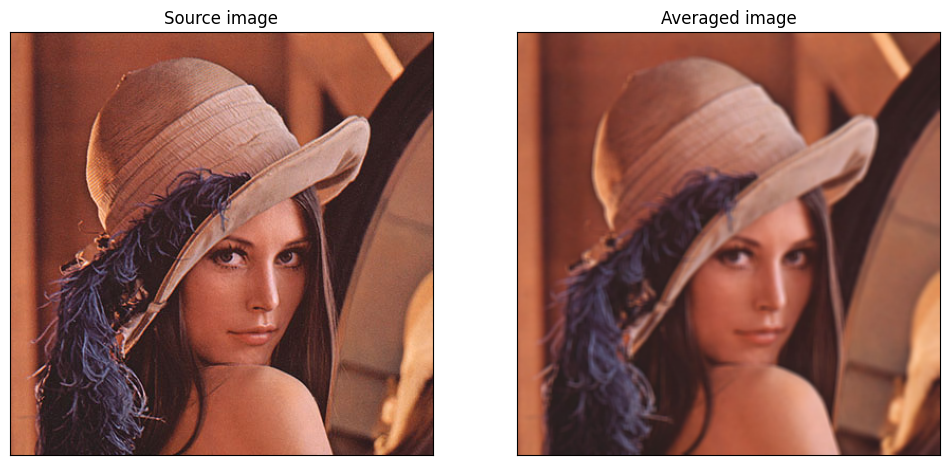

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
img_path = 'data/lena.png'

# Открываем изображение:
img = cv.imread(img_path, 1)

# Создаем фильтр свертки:
n, m = 5, 5
kernel = np.ones((n,m),np.float32)/(n*m)

# Применяем свертку:
img_avg = cv.filter2D(img,-1,kernel)

plt.subplot(1,2,1), plt.imshow(img[...,::-1]), plt.title('Source image')
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2), plt.imshow(img_avg[...,::-1]), plt.title('Averaged image')
plt.xticks([]),plt.yticks([])
plt.show()

print (kernel)

## 4.2 Размытие изображения (blurring)
[cv.blur(src, ksize\[, dst\[, anchor\[, borderType\]\]\])](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37)
<br>
*src*: исходное изображение
<br>
*kernel*: фильтр
<br>
*achor*: (-1,-1)
<br>
*borderType*: метод экстраполяции пикселей на границе изображения

<img src="./images/blur.png">

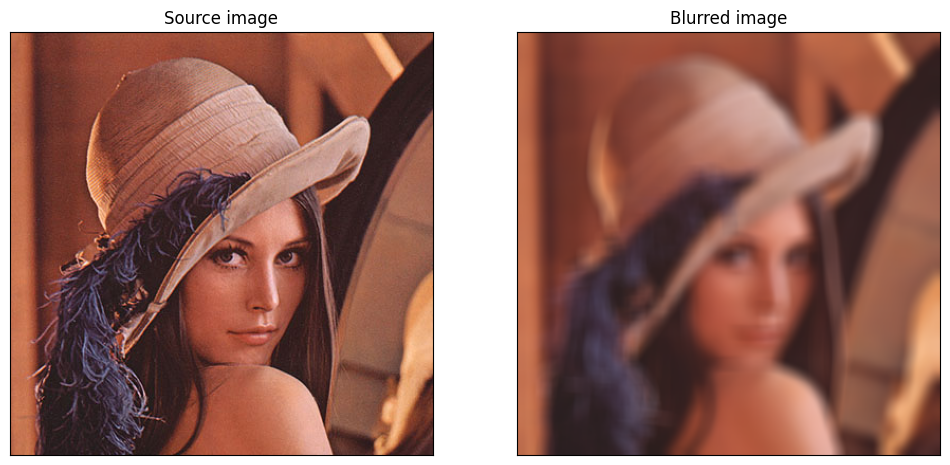

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
img_path = 'data/lena.png'

# Открываем изображение:
img = cv.imread(img_path, 1)

# Применяем размытие:
img_blur = cv.blur(img,(15,15))

plt.subplot(1,2,1), plt.imshow(img[...,::-1]), plt.title('Source image')
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2), plt.imshow(img_blur[...,::-1]), plt.title('Blurred image')
plt.xticks([]),plt.yticks([])
plt.show()

## 4.3 Размытие фильтром Гаусса
[cv.GaussianBlur(src, ksize, sigmaX\[, dst\[, sigmaY\[, borderType\]\]\])](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1)
<br>
*src*: исходное изображение
<br>
*ksize*: размер фильтра Гаусса
<br>
*sigmaX / sigmaY*: Стандартное отклонение (сигма) для фильтра по оси X / Y. Если 0, то вычисляется из размера фильтра
<br>
*borderType*: метод экстраполяции пикселей на границе изображения

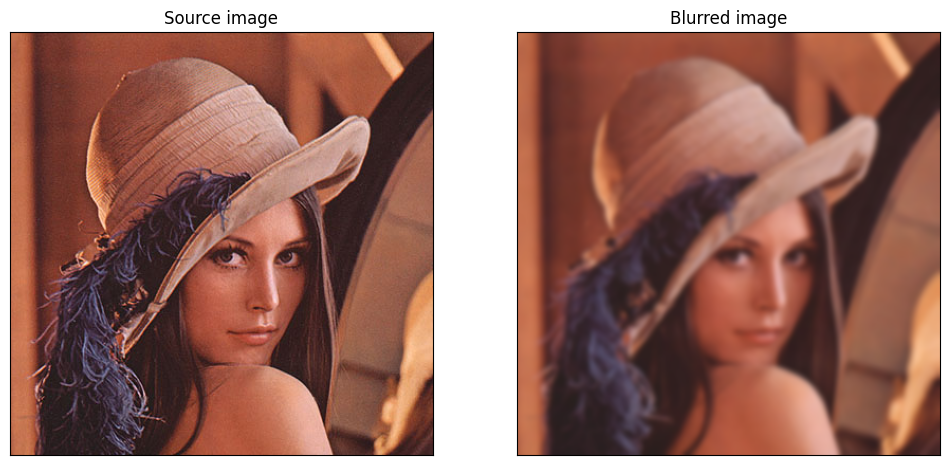

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
img_path = 'data/lena.png'

# Открываем изображение:
img = cv.imread(img_path, 1)

# Размытие фильтром Гаусса:
img_blur = cv.GaussianBlur(img, (15,15), 0)

plt.subplot(1,2,1), plt.imshow(img[...,::-1]), plt.title('Source image')
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2), plt.imshow(img_blur[...,::-1]), plt.title('Blurred image')
plt.xticks([]),plt.yticks([])
plt.show()

## 4.4 Медианное размытие
[cv.medianBlur(src, ksize\[, dst\])](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9)
<br>
*src*: исходное изображение
<br>
*ksize*: размер медианного фильтра

In [ ]:
# Функция реализует добавление шума типа "соль-и-перец" на изображение:
def add_salt_pepper(img, s_vs_p=0.5, amount=0.04):
    out = np.copy(img)
    
    # Соль:
    num_salt = np.ceil(amount * img.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
    out[tuple(coords)] = 255

    # Перец:
    num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
    out[tuple(coords)] = 0
    
    return out

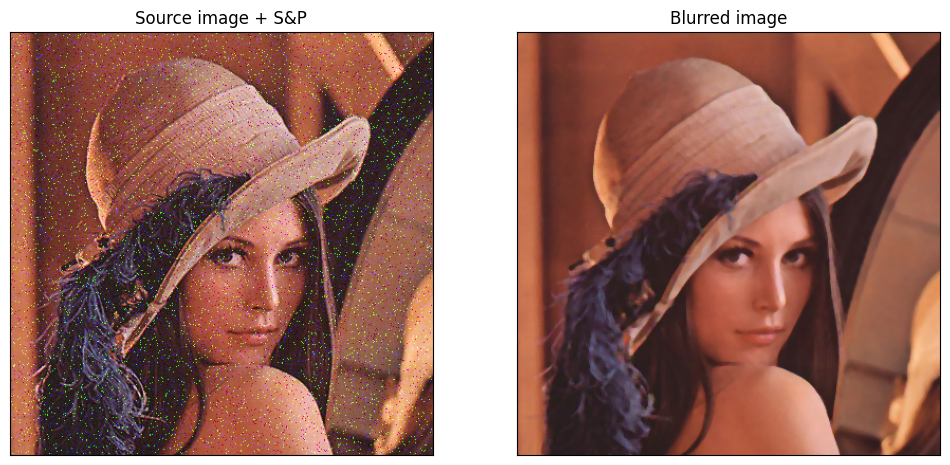

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
img_path = 'data/lena.png'

# Открываем изображение:
img = cv.imread(img_path, 1)

# Добавляем шум типа "соль и перец":
img = add_salt_pepper(img, s_vs_p=0.5, amount = 0.04)

# Размытие медианным фильтром:
img_blur = cv.medianBlur(img, 5)

plt.subplot(1,2,1), plt.imshow(img[...,::-1]), plt.title('Source image + S&P')
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2), plt.imshow(img_blur[...,::-1]), plt.title('Blurred image')
plt.xticks([]),plt.yticks([])
plt.show()

## 5.1 Бинаризация изображения по порогу
[cv.threshold(src, thresh, maxval, type\[, dst\])](https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57)
<br>
*src*: исходное изображение
<br>
*thresh*: заданный порог
<br>
*maxval*: значение, присваемое пикселю при превышении порога
<br>
*type*: тип порога (см. картинку)

<img src="./images/threshold.png">

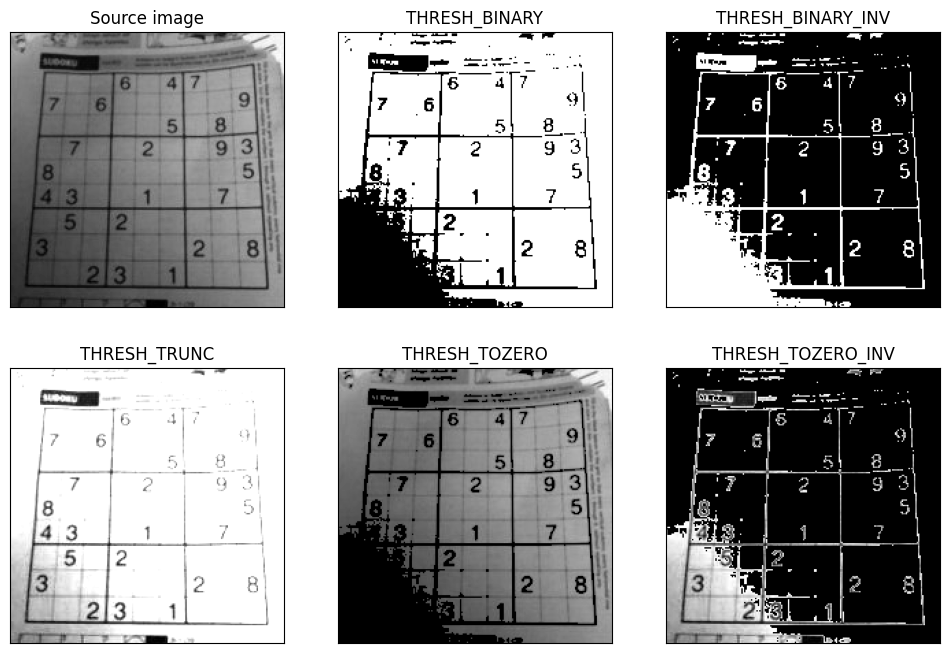

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
img_path = 'data/crossword.png'

# Открываем изображение:
img_gray = cv.imread(img_path, 0)

# Бинаризация по порогу:
_, img_bin1 = cv.threshold(img_gray,80,255,cv.THRESH_BINARY)
_, img_bin2 = cv.threshold(img_gray,80,255,cv.THRESH_BINARY_INV)
_, img_bin3 = cv.threshold(img_gray,80,255,cv.THRESH_TRUNC)
_, img_bin4 = cv.threshold(img_gray,80,255,cv.THRESH_TOZERO)
_, img_bin5 = cv.threshold(img_gray,80,255,cv.THRESH_TOZERO_INV)

imgages = [img_gray, img_bin1, img_bin2, img_bin3, img_bin4, img_bin5]
titles = ['Source image', 'THRESH_BINARY', 'THRESH_BINARY_INV', 'THRESH_TRUNC', 'THRESH_TOZERO', 'THRESH_TOZERO_INV']
plt.rcParams['figure.figsize'] = [12, 8]

for i, img in enumerate(imgages):
    plt.subplot(2,3,i+1),plt.imshow(img,'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## 5.2 Адаптивная бинаризаци
[cv.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C\[, dst\]](https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3)
<br>
*src*: исходное изображение
<br>
*maxval*: значение, присваемое пикселю при превышении порога
<br>
*adaptiveMethod*: метод адаптивной бинаризации (см. картинку)
<br>
*thresholdType*: тип порога (см. картинку)
<br>
*blockSize*: размер окрестности пикселя, используемой для вычисления порога (3,5,7 и т.д.) 
<br>
*C*: константа, которая вычитается из среднего или взвешенного среднего при вычислении порога

<img src="./images/AdaptiveThresholdTypes.png">

где *T(x,y)* - порог, вычисленный индивидуально для пикселя *(x,y)*.

<img src="./images/adaptiveThreshold.png">

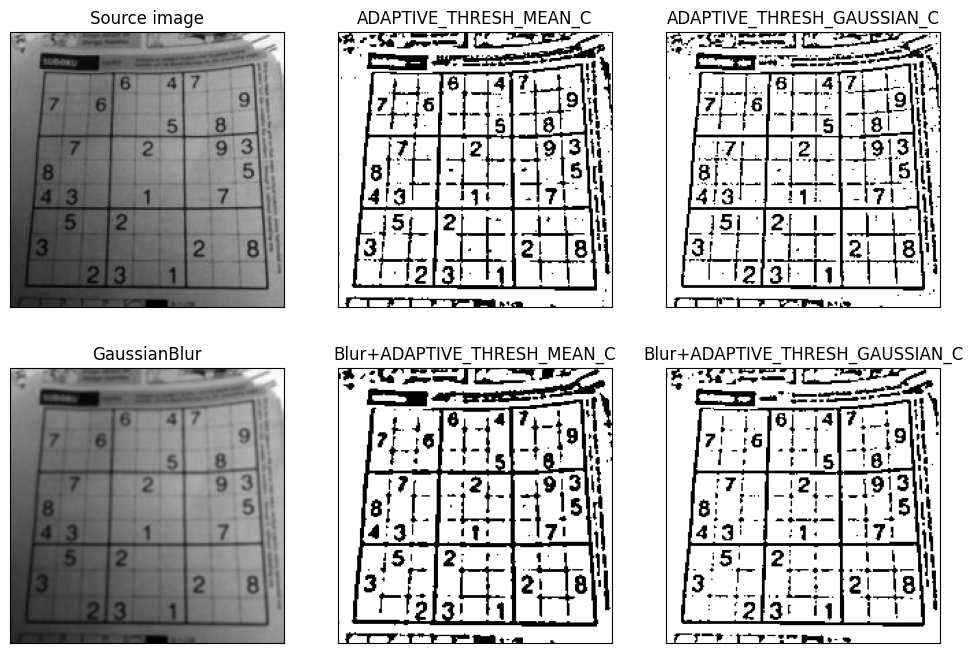

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
img_path = 'data/crossword.png'

# Открываем изображение:
img_gray = cv.imread(img_path, 0)

# Адаптивная бинаризация:
img_bin1 = cv.adaptiveThreshold(img_gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,5)
img_bin2 = cv.adaptiveThreshold(img_gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,5)

# Адаптивная бинаризация после сглаживания:
img_blur = cv.GaussianBlur(img_gray,(3,3),0)
img_bin3 = cv.adaptiveThreshold(img_blur,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,5)
img_bin4 = cv.adaptiveThreshold(img_blur,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,5)

plt.subplot(2,3,1), plt.imshow(img_gray,'gray'), plt.title("Source image")
plt.xticks([]),plt.yticks([])
plt.subplot(2,3,2), plt.imshow(img_bin1,'gray'), plt.title('ADAPTIVE_THRESH_MEAN_C')
plt.xticks([]),plt.yticks([])
plt.subplot(2,3,3), plt.imshow(img_bin2,'gray'), plt.title('ADAPTIVE_THRESH_GAUSSIAN_C')
plt.xticks([]),plt.yticks([])
plt.subplot(2,3,4), plt.imshow(img_blur,'gray'), plt.title('GaussianBlur')
plt.xticks([]),plt.yticks([])
plt.subplot(2,3,5), plt.imshow(img_bin3,'gray'), plt.title('Blur+ADAPTIVE_THRESH_MEAN_C')
plt.xticks([]),plt.yticks([])
plt.subplot(2,3,6), plt.imshow(img_bin4,'gray'), plt.title('Blur+ADAPTIVE_THRESH_GAUSSIAN_C')
plt.xticks([]),plt.yticks([])
plt.show()

## 5.3 Бинаризация методом Оцу (Отсу)

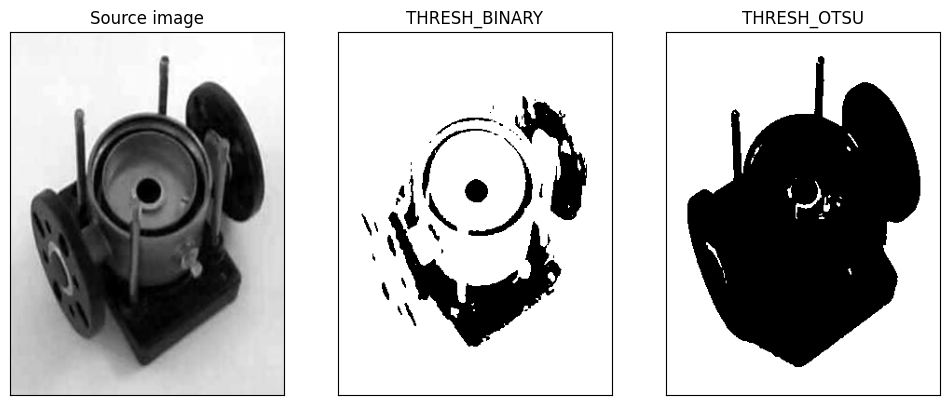

threshold by Otsu: 136.0


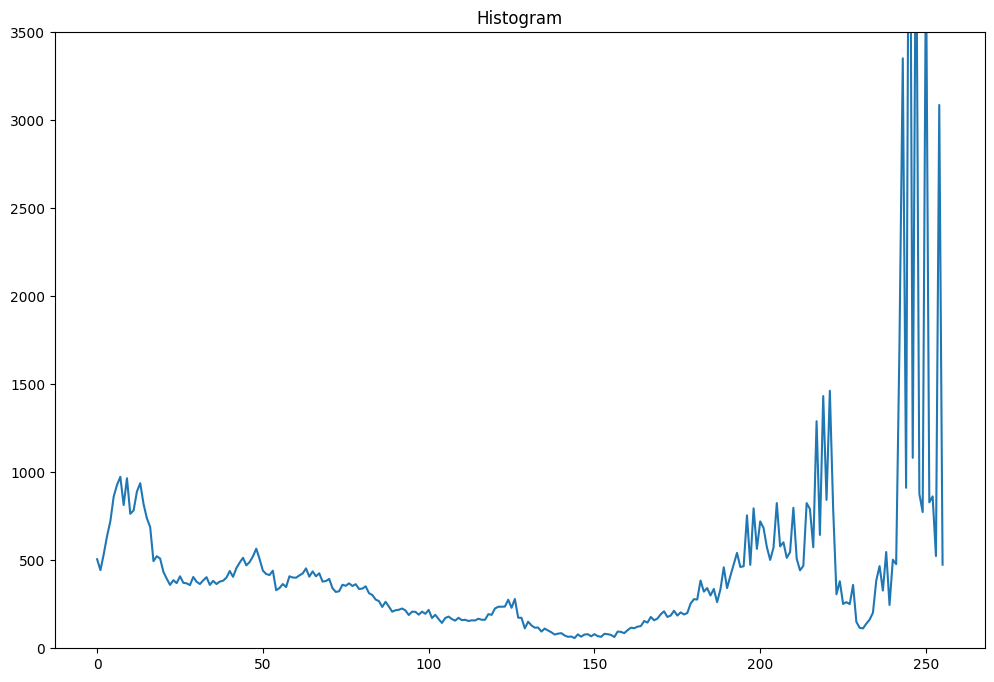

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
img_path = 'data/part.png'

# Открываем изображение:
img_gray = cv.imread(img_path, 0)

# Бинаризация по порогу:
_, img_bin1 = cv.threshold(img_gray,20,255,cv.THRESH_BINARY)
threshold, img_bin2 = cv.threshold(img_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

plt.subplot(1,3,1), plt.imshow(img_gray,'gray'), plt.title("Source image")
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2), plt.imshow(img_bin1,'gray'), plt.title('THRESH_BINARY')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3), plt.imshow(img_bin2,'gray'), plt.title('THRESH_OTSU')
plt.xticks([]),plt.yticks([])
plt.show()

print ('threshold by Otsu:',threshold)

# Строим гистограмму:
histr = cv.calcHist([img_gray],[0],None,[256],[0,256])
plt.plot(histr)
plt.title('Histogram')
plt.ylim([0,3500])
plt.show()

## 6. Морфологические операции на изображениях
Морфология осуществляется над изображением при помощи структурного элемента, который задает характер морфологической операции:

<img src="./images/structuring_element.png" width=150 height=150>

## 6.1 Эрозия (Erosion)
[cv.erode(src, kernel\[, dst\[, anchor\[, iterations\[, borderType\[, borderValue\]\]\]\]\])](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb)
<br>
*src*: исходное изображение
<br>
*kernel*: структурный элемент
<br>
*anchor*: (-1,-1)
<br>
*iterations*: сколько раз применяется операция
<br>
*borderType*: метод экстраполяции на границе изображения
<br>
*borderValue*: значение на границе в случае BORDER_CONSTANT

<img src="./images/erode.png">

[[1 1 1]
 [1 1 1]
 [1 1 1]]


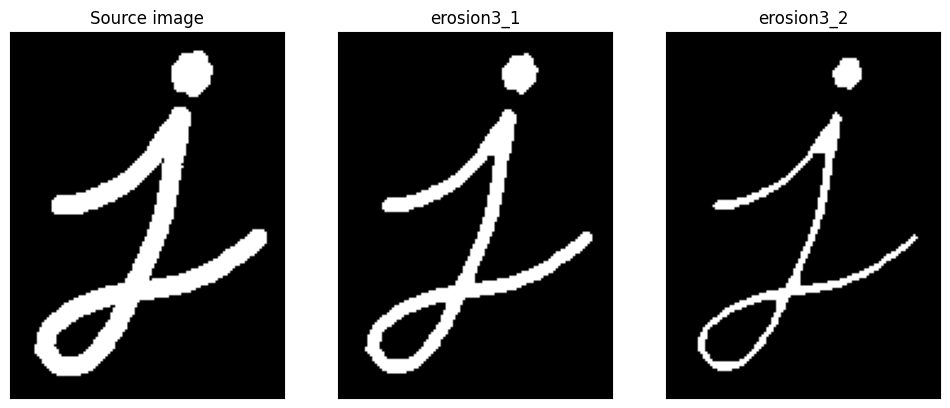

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


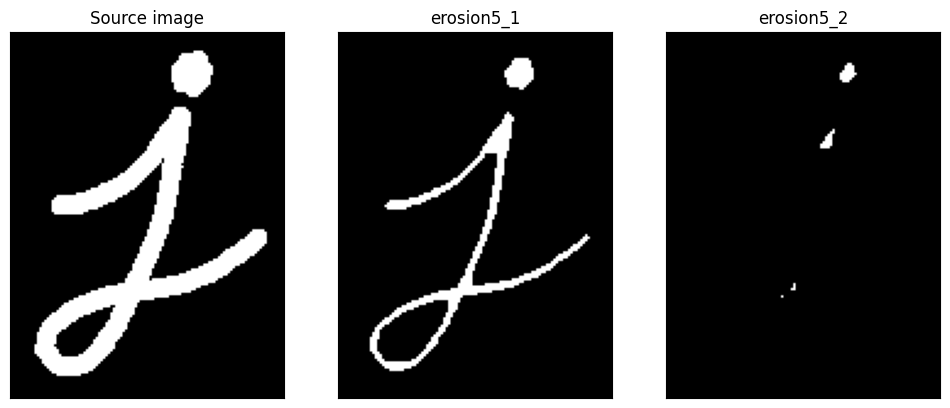

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
img_path = 'data/j.png'

# Открываем изображение:
img = cv.imread(img_path, 0)

# Бинаризуем изображение:
_, img_bin = cv.threshold(img,128,255,cv.THRESH_BINARY)

# Создаем структурные элементы:
kernel3 = np.ones((3,3),np.uint8)
kernel5 = np.ones((5,5),np.uint8)
# kernel3[:] = 0
# kernel3[1,:] = 1

# Применяем эрозию:
erosion3_1 = cv.erode(img_bin, kernel3, iterations=1)
erosion3_2 = cv.erode(img_bin, kernel3, iterations=2)
erosion5_1 = cv.erode(img_bin, kernel5, iterations=1)
erosion5_2 = cv.erode(img_bin, kernel5, iterations=2)

print(kernel3)
plt.subplot(1,3,1), plt.imshow(img_bin,'gray'), plt.title("Source image")
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2), plt.imshow(erosion3_1,'gray'), plt.title('erosion3_1')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3), plt.imshow(erosion3_2,'gray'), plt.title('erosion3_2')
plt.xticks([]),plt.yticks([])
plt.show()

print(kernel5)
plt.subplot(1,3,1), plt.imshow(img_bin,'gray'), plt.title("Source image")
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2), plt.imshow(erosion5_1,'gray'), plt.title("erosion5_1")
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3), plt.imshow(erosion5_2,'gray'), plt.title('erosion5_2')
plt.xticks([]),plt.yticks([])
plt.show()

## 6.2 Наращивание (Dilation)
[cv.dilate(src, kernel\[, dst\[, anchor\[, iterations\[, borderType\[, borderValue\]\]\]\]\])](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c)
<br>
*src*: исходное изображение
<br>
*kernel*: структурный элемент
<br>
*anchor*: (-1,-1)
<br>
*iterations*: сколько раз применяется операция
<br>
*borderType*: метод экстраполяции на границе изображения
<br>
*borderValue*: значение на границе в случае BORDER_CONSTANT

<img src="./images/dilate.png">

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


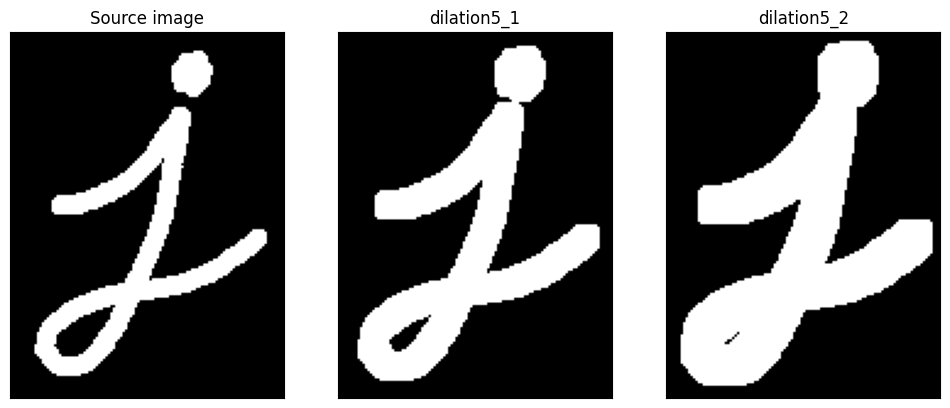

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
img_path = 'data/j.png'

# Открываем изображение:
img = cv.imread(img_path, 0)

# Бинаризуем изображение:
_, img_bin = cv.threshold(img,128,255,cv.THRESH_BINARY)

# Создаем структурные элементы:
kernel5 = np.ones((5,5),np.uint8)

# Применяем наращивание:
dilation5_1 = cv.dilate(img_bin, kernel5, iterations=1)
dilation5_2 = cv.dilate(img_bin, kernel5, iterations=2)

print(kernel5)
plt.subplot(1,3,1), plt.imshow(img_bin,'gray'), plt.title("Source image")
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2), plt.imshow(dilation5_1,'gray'), plt.title('dilation5_1')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3), plt.imshow(dilation5_2,'gray'), plt.title('dilation5_2')
plt.xticks([]),plt.yticks([])
plt.show()

## 6.3 Размыкание (Opening)

[cv.morphologyEx(src, op, kernel\[, dst\[, anchor\[, iterations\[, borderType\[, borderValue\]\]\]\]\])](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f)
<br>
*src*: исходное изображение
<br>
*op*: [тип операции](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga7be549266bad7b2e6a04db49827f9f32)
<br>
*kernel*: структурный элемент
<br>
*anchor*: (-1,-1)
<br>
*iterations*: сколько раз применяется операция
<br>
*borderType*: метод экстраполяции на границе изображения
<br>
*borderValue*: значение на границе в случае BORDER_CONSTANT

Размыкание это эрозия с последующим наращиванием.

<img src="./images/MORPH_OPEN.png">

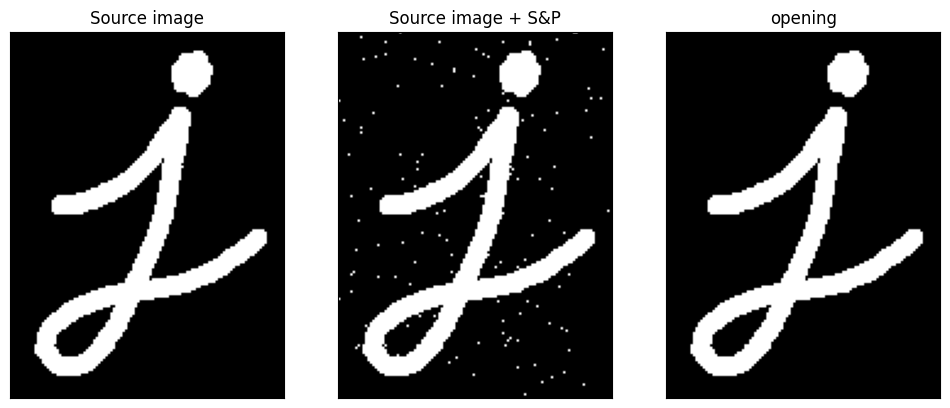

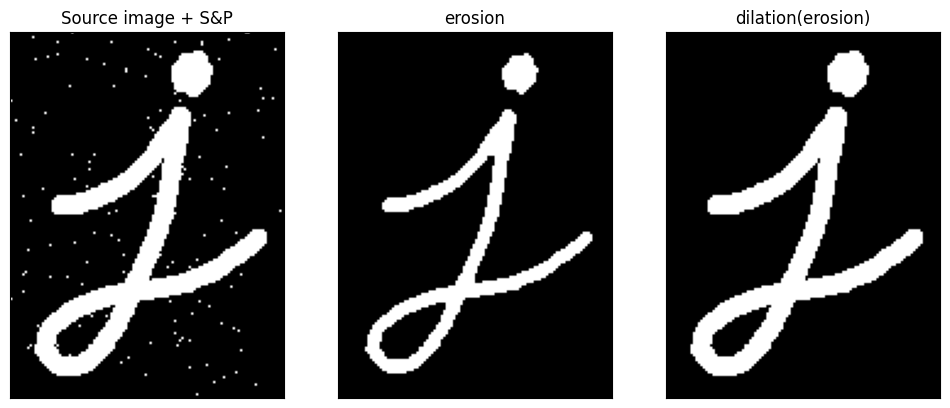

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
img_path = 'data/j.png'

# Открываем изображение:
img = cv.imread(img_path, 0)

# Добавляем шум типа "соль":
img_sp = add_salt_pepper(img, s_vs_p=1.0, amount = 0.009)

# Бинаризуем изображение:
_, img_bin = cv.threshold(img_sp,128,255,cv.THRESH_BINARY)

# Создаем структурные элементы:
kernel5 = np.ones((3,3),np.uint8)

# Применяем размыкание:
opening = cv.morphologyEx(img_bin, cv.MORPH_OPEN, kernel5)

plt.subplot(1,3,1), plt.imshow(img,'gray'), plt.title("Source image")
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2), plt.imshow(img_bin,'gray'), plt.title("Source image + S&P")
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3), plt.imshow(opening,'gray'), plt.title('opening')
plt.xticks([]),plt.yticks([])
plt.show()

# Размыкание по шагам:
erosion = cv.morphologyEx(img_bin, cv.MORPH_ERODE, kernel5)
dilation = cv.morphologyEx(erosion, cv.MORPH_DILATE, kernel5)

plt.subplot(1,3,1), plt.imshow(img_bin,'gray'), plt.title('Source image + S&P')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2), plt.imshow(erosion,'gray'), plt.title('erosion')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3), plt.imshow(dilation,'gray'), plt.title('dilation(erosion)')
plt.xticks([]),plt.yticks([])
plt.show()

## 6.4 Замыкание (Closing)

Замыкание это наращивание с последующей эрозией. 

<img src="./images/MORPH_CLOSE.png">

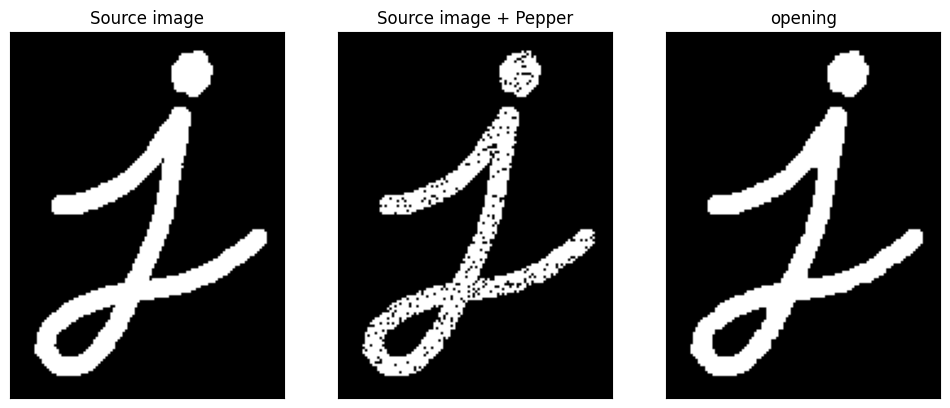

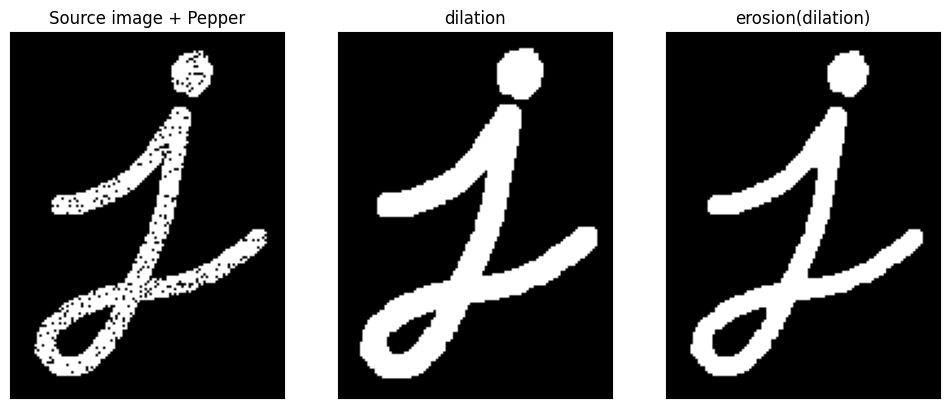

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
img_path = 'data/j.png'

# Открываем изображение:
img = cv.imread(img_path, 0)

# Добавляем шум типа "перец":
img_sp = add_salt_pepper(img, s_vs_p=0.0, amount = 0.125)

# Бинаризуем изображение:
_, img_bin = cv.threshold(img_sp,128,255,cv.THRESH_BINARY)

# Создаем структурные элементы:
kernel5 = np.ones((3,3),np.uint8)

# Применяем замыкание:
closing = cv.morphologyEx(img_bin, cv.MORPH_CLOSE, kernel5)

plt.subplot(1,3,1), plt.imshow(img,'gray'), plt.title("Source image")
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2), plt.imshow(img_bin,'gray'), plt.title("Source image + Pepper")
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3), plt.imshow(closing,'gray'), plt.title('opening')
plt.xticks([]),plt.yticks([])
plt.show()

# Замыкание по шагам:
dilation = cv.morphologyEx(img_bin, cv.MORPH_DILATE, kernel5)
erosion = cv.morphologyEx(dilation, cv.MORPH_ERODE, kernel5)

plt.subplot(1,3,1), plt.imshow(img_bin,'gray'), plt.title("Source image + Pepper")
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2), plt.imshow(dilation,'gray'), plt.title('dilation')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3), plt.imshow(erosion,'gray'), plt.title('erosion(dilation)')
plt.xticks([]),plt.yticks([])
plt.show()

## 6.5 Морфологический градиент

Морфологический градиент это разница между наращиванием и эрозией. 

<img src="./images/MORPH_GRADIENT.png">

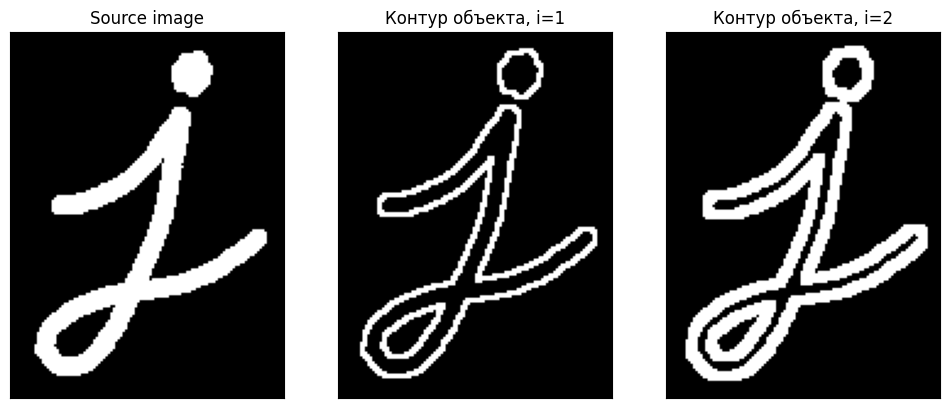

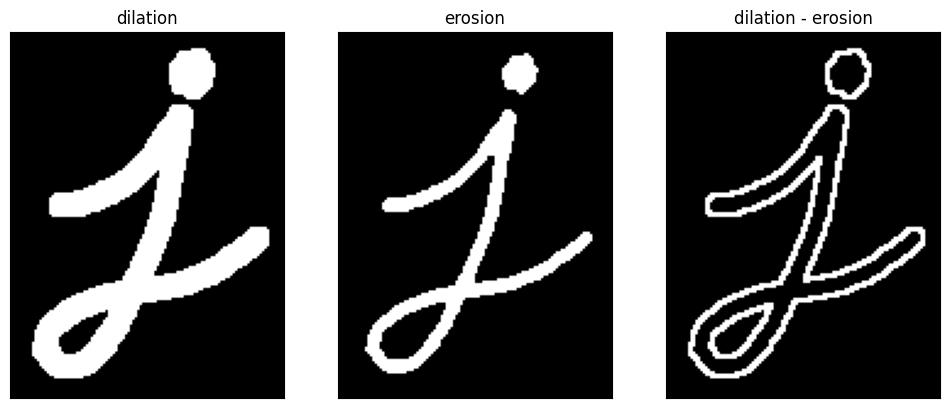

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
img_path = 'data/j.png'

# Открываем изображение:
img = cv.imread(img_path, 0)

# Бинаризуем изображение:
_, img_bin = cv.threshold(img,128,255,cv.THRESH_BINARY)

# Создаем структурные элементы:
kernel5 = np.ones((3,3),np.uint8)

# Применяем морфологический градиент:
outline = cv.morphologyEx(img_bin, cv.MORPH_GRADIENT, kernel5)
outline2 = cv.morphologyEx(img_bin, cv.MORPH_GRADIENT, kernel5, iterations=2)

plt.subplot(1,3,1), plt.imshow(img_bin,'gray'), plt.title("Source image")
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2), plt.imshow(outline,'gray'), plt.title('Контур объекта, i=1')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3), plt.imshow(outline2,'gray'), plt.title('Контур объекта, i=2')
plt.xticks([]),plt.yticks([])
plt.show()

# Морфологический градиент по шагам:
dilation = cv.morphologyEx(img_bin, cv.MORPH_DILATE, kernel5)
erosion = cv.morphologyEx(img_bin, cv.MORPH_ERODE, kernel5)
outline3 = dilation - erosion

plt.subplot(1,3,1), plt.imshow(dilation,'gray'), plt.title("dilation")
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2), plt.imshow(erosion,'gray'), plt.title('erosion')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3), plt.imshow(outline3,'gray'), plt.title('dilation - erosion')
plt.xticks([]),plt.yticks([])
plt.show()

## 6.6 Top Hat

Top Hat это разница между изображением и его размыканием.

<img src="./images/MORPH_TOPHAT.png">

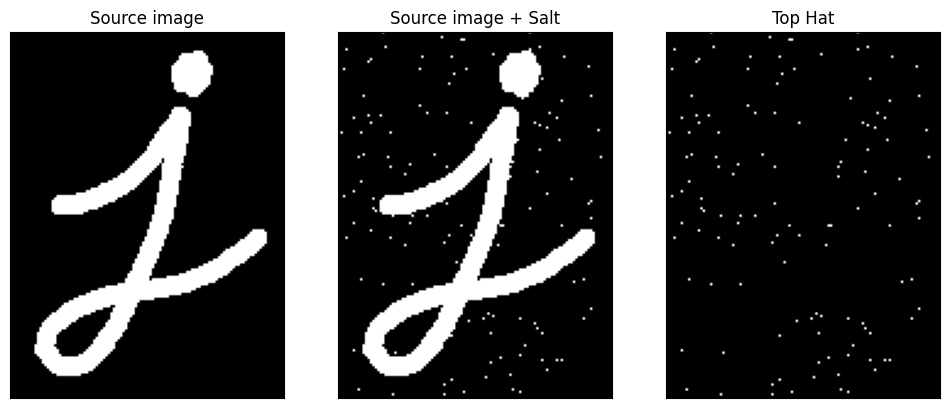

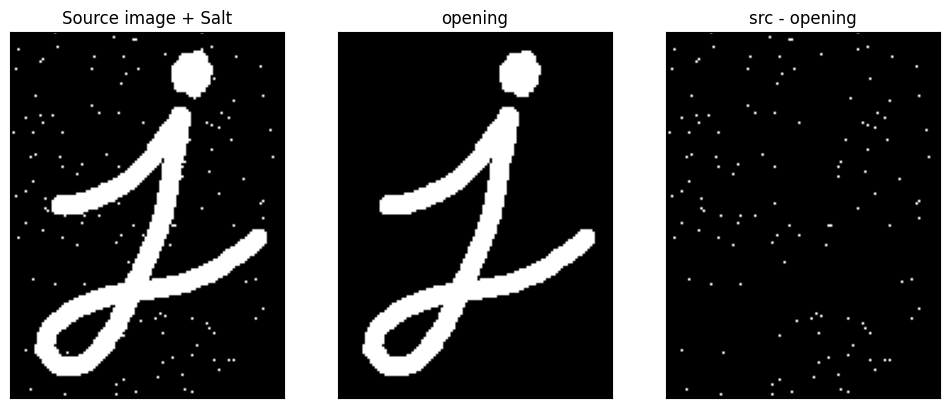

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
img_path = 'data/j.png'

# Открываем изображение:
img = cv.imread(img_path, 0)

# Добавляем шум типа "соль":
img_sp = add_salt_pepper(img, s_vs_p=1.0, amount = 0.009)

# Бинаризуем изображение:
_, img_bin = cv.threshold(img_sp,128,255,cv.THRESH_BINARY)

# Создаем структурные элементы:
kernel5 = np.ones((3,3),np.uint8)

# Применяем TopHat:
tophat = cv.morphologyEx(img_bin, cv.MORPH_TOPHAT, kernel5)

plt.subplot(1,3,1), plt.imshow(img,'gray'), plt.title("Source image")
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2), plt.imshow(img_bin,'gray'), plt.title("Source image + Salt")
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3), plt.imshow(tophat,'gray'), plt.title('Top Hat')
plt.xticks([]),plt.yticks([])
plt.show()

# TopHat по шагам:
opening = cv.morphologyEx(img_bin, cv.MORPH_OPEN, kernel5)
tophat = img_bin - opening

plt.subplot(1,3,1), plt.imshow(img_bin,'gray'), plt.title("Source image + Salt")
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2), plt.imshow(opening,'gray'), plt.title('opening')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3), plt.imshow(tophat,'gray'), plt.title('src - opening')
plt.xticks([]),plt.yticks([])
plt.show()

## 6.7 Black Hat

Black Hat это разница между размыканием изображения и самим изображением. 

<img src="./images/MORPH_BLACKHAT.png">

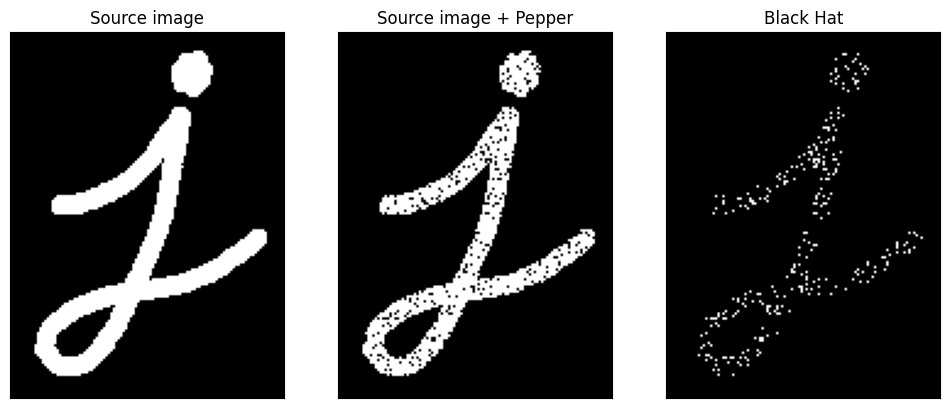

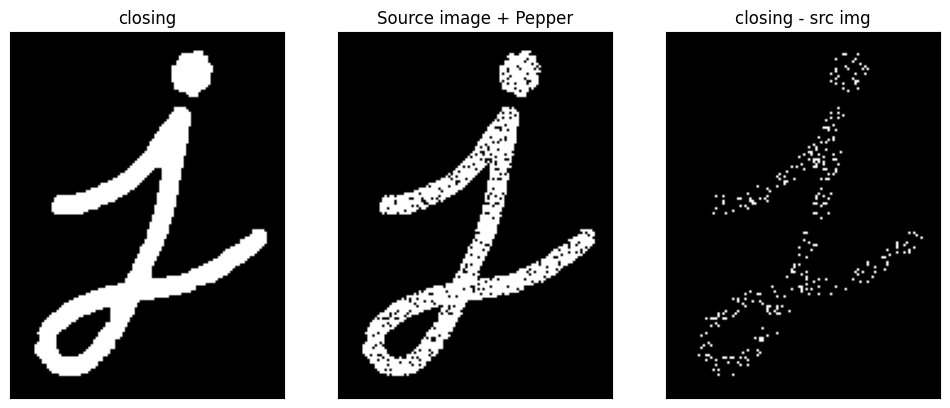

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
img_path = 'data/j.png'

# Открываем изображение:
img = cv.imread(img_path, 0)

# Добавляем шум типа "перец":
img_sp = add_salt_pepper(img, s_vs_p=0.0, amount = 0.125)

# Бинаризуем изображение:
_, img_bin = cv.threshold(img_sp,128,255,cv.THRESH_BINARY)

# Создаем структурные элементы:
kernel5 = np.ones((3,3),np.uint8)

# Применяем TopHat:
blackhat = cv.morphologyEx(img_bin, cv.MORPH_BLACKHAT, kernel5)

plt.subplot(1,3,1), plt.imshow(img,'gray'), plt.title("Source image")
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2), plt.imshow(img_bin,'gray'), plt.title("Source image + Pepper")
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3), plt.imshow(blackhat,'gray'), plt.title('Black Hat')
plt.xticks([]),plt.yticks([])
plt.show()

# TopHat по шагам:
closing = cv.morphologyEx(img_bin, cv.MORPH_CLOSE, kernel5)
blackhat = closing - img_bin

plt.subplot(1,3,1), plt.imshow(closing,'gray'), plt.title('closing')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2), plt.imshow(img_bin,'gray'), plt.title("Source image + Pepper")
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3), plt.imshow(blackhat,'gray'), plt.title('closing - src img')
plt.xticks([]),plt.yticks([])
plt.show()

## 6.8 Создание структурных элементов

[cv.getStructuringElement(shape, ksize\[, anchor\])](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc)
<br>
*shape*: форма структурного элемента (MORPH_RECT, MORPH_CROSS, MORPH_ELLIPSE)
<br>
*ksize*: размер структурного элемента
<br>
*anchor*: (-1,-1)

OpenCV предоставляет функцию для создания структурных элементов некоторых форм (прямоугольник, эллипс, крест). 

In [ ]:
# Прямоугольник:
rect = cv.getStructuringElement(cv.MORPH_RECT,(7,7))
print ('MORPH_RECT:')
print (rect,'\n')

# Прямоугольник:
ellipse = cv.getStructuringElement(cv.MORPH_ELLIPSE,(7,7))
print ('MORPH_ELLIPSE:')
print (ellipse,'\n')

# Прямоугольник:
cross = cv.getStructuringElement(cv.MORPH_CROSS,(7,7))
print ('MORPH_CROSS:')
print (cross)

MORPH_RECT:
[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]] 

MORPH_ELLIPSE:
[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]] 

MORPH_CROSS:
[[0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [1 1 1 1 1 1 1]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]]


## Как вытащить фичи:

In [ ]:
plt.rcParams['figure.figsize'] = [6, 4]
img_path = 'data/lena.png'

# Открываем изображение:
img_bgr = cv.imread(img_path, cv.IMREAD_COLOR)
img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)

# Считаем среднее по цвету:
mean_bgr = np.mean(img_bgr, (0,1))
mean_hsv = np.mean(img_hsv, (0,1))

# Конвертируем назад:
mean_hsv_bgr = cv.cvtColor(mean_hsv.reshape(1,1,3).astype(np.float32), cv.COLOR_HSV2BGR)

print (mean_bgr)
print (mean_hsv)
print (mean_hsv_bgr)


[ 68.091175   81.039875  134.7589875]
[ 33.98960625 125.6566125  135.04043125]
[[[-16833.684    -7221.0127     135.04044]]]


Как рисовать объекты:

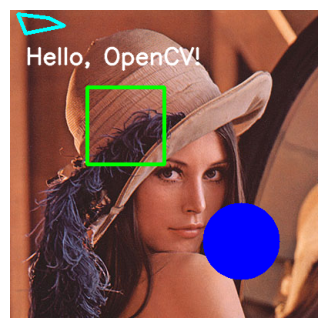

In [ ]:
# Путь к изображению
img_path = 'data/lena.png'

# 1. Открываем изображение:
img = cv.imread(img_path, 1)

# 2. Преобразуем изображение из BGR в RGB для правильного отображения в matplotlib
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# 3. Рисуем текст на изображении
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img_rgb, 'Hello, OpenCV!', (20, 70), font, 1, (255, 255, 255), 2, cv.LINE_AA)

# 4. Рисуем прямоугольник (бокс) на изображении
cv.rectangle(img_rgb, (100, 100), (200, 200), (0, 255, 0), 3)

# 5. Рисуем окружность на изображении
cv.circle(img_rgb, (300, 300), 50, (0, 0, 255), -1)

# 6. Рисуем полигон на изображении
pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv.polylines(img_rgb, [pts], True, (0, 255, 255), 3)

# Отображаем изображение с нарисованными элементами
plt.imshow(img_rgb)
plt.axis('off')  # Отключаем оси
plt.show()